In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/titanic.csv"
titanic = pd.read_csv(url)
titanic = titanic.rename(columns={'Sex':'gender'})  #컬럼명 완전 동일하게 할것!!! 영어대소문자!!
titanic

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


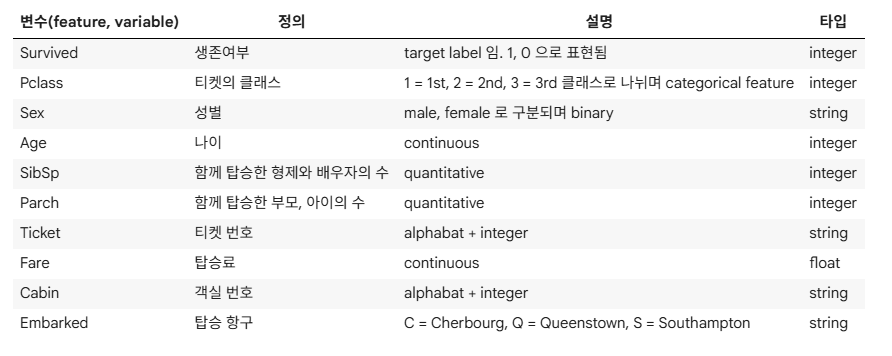

In [3]:
#결측치 확인
titanic.info()  #출력결과 : Age, Cabin, Embarked 891개 안됨.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#object 갯수 정보 확인?
titanic.describe(include='object')

,Name,gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644


<Axes: >

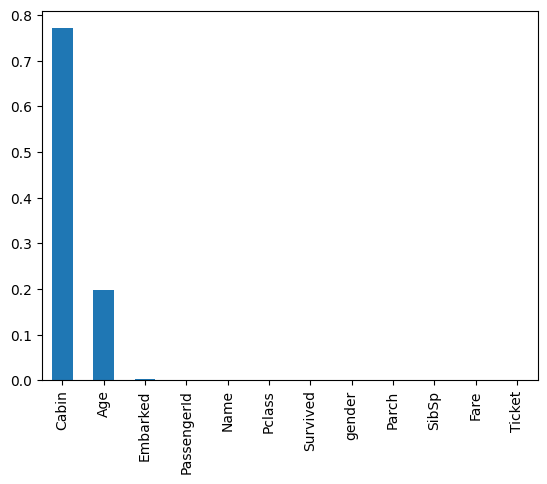

In [6]:
#null check
titanic.isna()
titanic.isna().sum()
titanic.isna().mean()
type(titanic.isna().mean())
titanic.isna().mean().sort_values(ascending=False)  #평균의 내림차순
titanic.isna().mean().sort_values(ascending=False).plot(kind='bar')

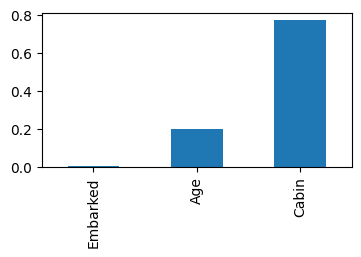

In [7]:
# #0인 값을 빼고, 결측치가 있는 컬럼만 보이게.
##DJ
# titanic_nan= titanic.loc[:, ['Cabin', 'Age', 'Embarked']]
# titanic_nan
# titanic_nan.isna().mean().sort_values(ascending=False).plot(kind='bar')

# #0인 값을 빼고, 결측치가 있는 컬럼만 보이게.
##teacher
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
temp = titanic.isna().mean()
temp[temp >0]
temp[temp >0].sort_values().plot(kind='bar')
plt.show()
#해석: Cabin은 살릴필요가 없다. 많은 값들이 비어있기 때문에.
#해석: 

In [8]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


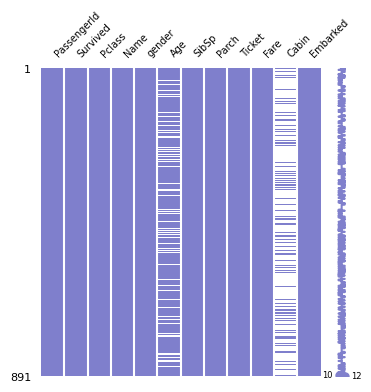

In [9]:
import missingno as msno

msno.matrix(df=titanic, figsize=(4,4), fontsize=7, color=(0.5,0.5,0.8))

plt.show()

<Axes: >

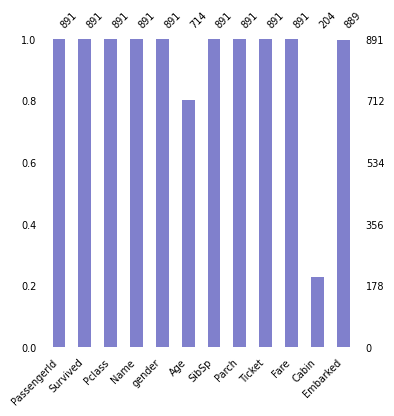

In [10]:
msno.bar(df=titanic, figsize=(4,4), fontsize=7, color=(0.5,0.5,0.8))

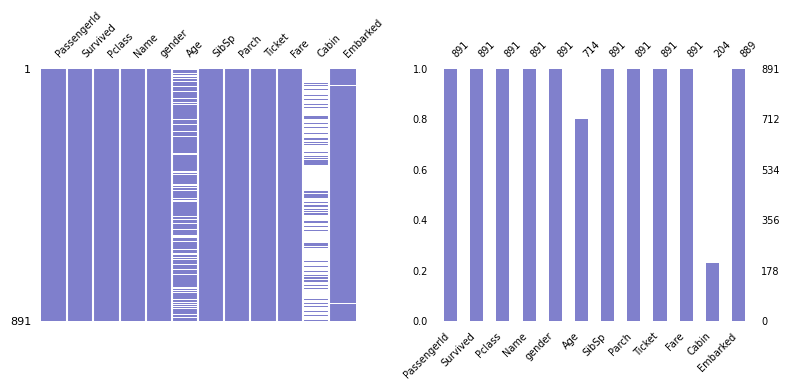

In [11]:
import missingno as msno

fig,axes = plt.subplots(1,2,figsize=(8,4))

msno.matrix(df=titanic, figsize=(4,4), fontsize=7, color=(0.5,0.5,0.8), ax=axes[0],sparkline=False)
msno.bar(df=titanic, figsize=(4,4), fontsize=7, color=(0.5,0.5,0.8), ax=axes[1])

plt.tight_layout()  # 겹치지 않게 정리
plt.show()


In [12]:
# Age컬럼의 결측치가 있는 모든 row를 출력

import numpy as np
np.array([True, False,True,False]).any()  #==> any는 or와 같음. 그래서 결과가 np.True_


test = pd.DataFrame({
    'a' : [1, np.nan, 7, np.nan],
    'b' : [2,5,6,np.nan],
    'c' : [3,5,9,3]   
    })

print(test.isna())
print(test.isna().any())  #a와 b컬럼에 True가 하나라도 있어서 True로 나옴

test[test.isna().any(axis=1)]

       a      b      c
0  False  False  False
1   True  False  False
2  False  False  False
3   True   True  False
a     True
b     True
c    False
dtype: bool


,a,b,c
1,NaN,5.0,5
3,NaN,NaN,3


In [13]:
# Age컬럼의 결측치가 있는 모든 row를 출력
# titanic[titanic['Age'].isna()]
missing_df=titanic[titanic.isna().any(axis=1)]
missing_df

missing_df2=titanic[titanic.drop(columns=['Cabin']).isna().any(axis=1)]
missing_df2

,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [14]:
# Embarked 컬럼의 결측치가 있는 모든 row를 출력

missing_df3=titanic[titanic.Embarked.isna()]  #missing_df3=titanic[titanic['Embarked'].isna()]
missing_df3




,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
# 상기 NaN 주변의 정보를 알아보자
k=3
df_lists=[]
for i in titanic[titanic.Embarked.isna()].index:
    df_lists.append(titanic.loc[i-k:i+k])
df_lists
pd.concat(df_lists)   
#여러개 데이터프레임을 합치는 방법 (컬럼은 같은데 다른 파일로 제공되는 자료들을 합칠때 concat을 많이 사용함. glob과 함께 사용하는 경우가 많음.)


,PassengerId,Survived,Pclass,Name,gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.00,0,0,2669,7.2292,NaN,C
61,62,1,1,"Icard, Miss. Amelie",female,38.00,0,0,113572,80.0000,B28,NaN
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.00,1,0,36973,83.4750,C83,S
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,NaN,S
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


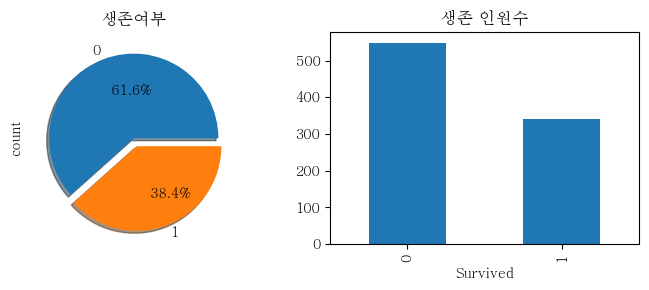

In [16]:

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\batang.ttc"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


#생존유무 pie그래프 : 확률을 볼 때 좋음
f,ax = plt.subplots(1,2, figsize=(5,3))
titanic.Survived.value_counts().plot.pie(autopct='%11.1f%%', shadow=True, explode = [0, 0.1], figsize=(6,6), ax=ax[0])
ax[0].set_title('생존여부')
titanic.Survived.value_counts().plot(kind='bar', ax=ax[1], figsize=(7,3))
ax[1].set_title('생존 인원수')
plt.tight_layout()  # 겹치지 않게 정리
plt.show()


In [17]:
#선실등급별 생존유무
titanic.groupby('Pclass')[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True) #margins=True 합계
pd.crosstab(titanic['Pclass'], titanic['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [19]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


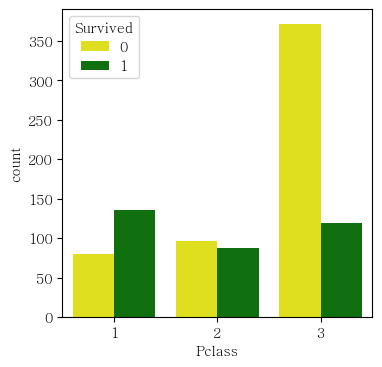

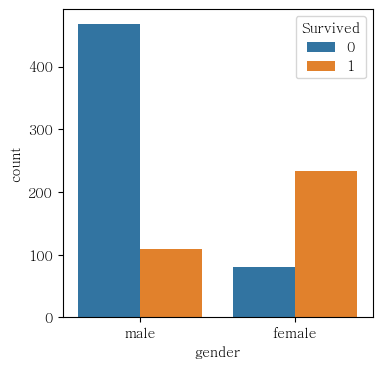

In [20]:
#seaborn
import seaborn as sns
import matplotlib.pyplot as plt   #sns에서는 사이즈 조절이 없기 때문에, 사이즈 조절하려면 matplotlib 사용해야함.
plt.figure(figsize=(4, 4))
sns.countplot(data=titanic, x='Pclass', hue='Survived', palette=['yellow', 'green'], legend=True)
plt.show()

plt.figure(figsize=(4, 4))
sns.countplot(data=titanic, x='gender', hue='Survived', legend=True) #palette 값안주면 default값 들어감.
plt.show()

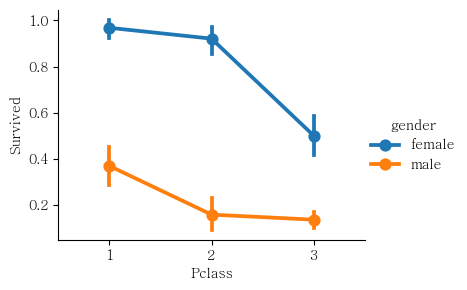

In [21]:
# 선실 등급별, 성별에 따라서 생존확률이 높다는 것을 알 수 있음. 
# 두 특성을 한꺼번에 비교하는 시각화 툴
# catplot()
sns.catplot(data=titanic, x='Pclass', y='Survived', hue='gender', kind='point', height=3, aspect=1.3) #size 조절 : height=3, aspect=1.3
plt.show()

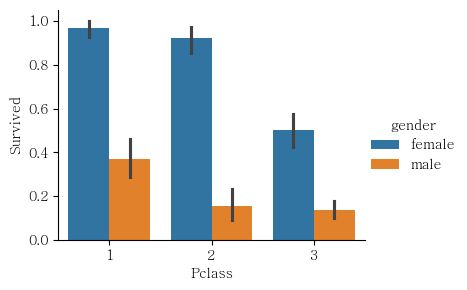

In [22]:
sns.catplot(data=titanic, x='Pclass', y='Survived', hue='gender', kind='bar', height=3, aspect=1.3) #size 조절 : height=3, aspect=1.3
plt.show()
#하기 검은선은 신뢰구간을 나타냄

In [23]:
#나이가 가장 낮은 승객, 높은 승객, 평균나이

print(titanic.Age.mean())
print(titanic.Age.max())
print(titanic.Age.min())


titanic.Age.describe()
titanic.Age.agg(['mean', 'max', 'min'])


29.69911764705882
80.0
0.42


mean    29.699118
max     80.000000
min      0.420000
Name: Age, dtype: float64

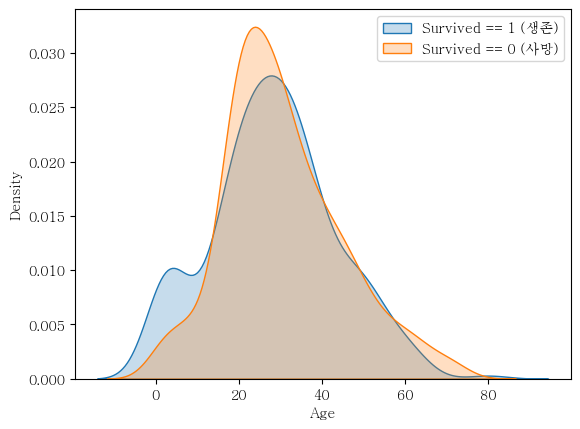

In [24]:
#밀도 추세선 : sns.kdeplot
sns.kdeplot(
    data= titanic[titanic.Survived == 1], x='Age', label = 'Survived == 1 (생존)', fill=True
)
sns.kdeplot(
    data= titanic[titanic.Survived == 0], x='Age', label = 'Survived == 0 (사망)', fill=True
)

plt.legend(loc='best')
plt.show()


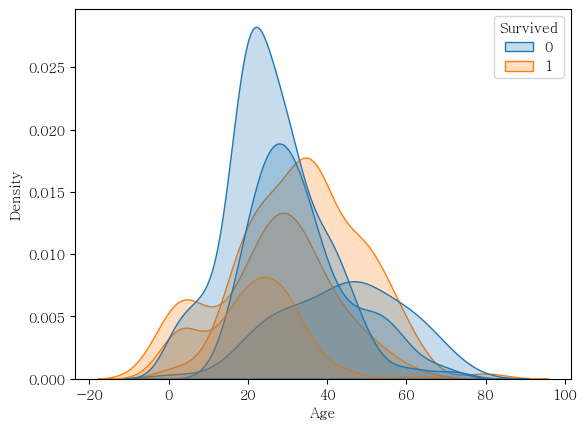

In [25]:
#위의 표를 응용해서 Pclass별로 생존유무에 대한 시각화

sns.kdeplot(
    data= titanic[titanic.Pclass == 1], x='Age', hue='Survived', label = 'Pclass == 1 ', fill=True
)
sns.kdeplot(
    data= titanic[titanic.Pclass == 2], x='Age', hue='Survived', label = 'Pclass == 2 ', fill=True
)
sns.kdeplot(
    data= titanic[titanic.Pclass == 3], x='Age', hue='Survived', label = 'Pclass == 3 ', fill=True
)


plt.show()

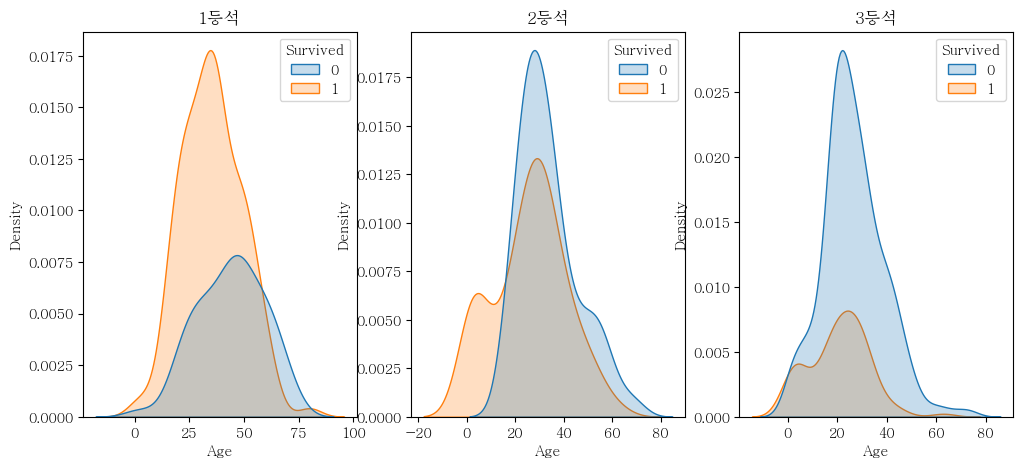

In [30]:
#위의 표를 응용해서 Pclass별로 생존유무에 대한 시각화
f,ax = plt.subplots(1,3, figsize=(12,5))
ax[0].set_title('1등석')
ax[1].set_title('2등석')
ax[2].set_title('3등석')

sns.kdeplot(
    data= titanic[titanic.Pclass == 1], x='Age', hue='Survived', label = 'Pclass == 1 ', fill=True, ax=ax[0])
sns.kdeplot(
    data= titanic[titanic.Pclass == 2], x='Age', hue='Survived', label = 'Pclass == 2 ', fill=True, ax=ax[1]
)
sns.kdeplot(
    data= titanic[titanic.Pclass == 3], x='Age', hue='Survived', label = 'Pclass == 3 ', fill=True, ax=ax[2]
)


plt.show()

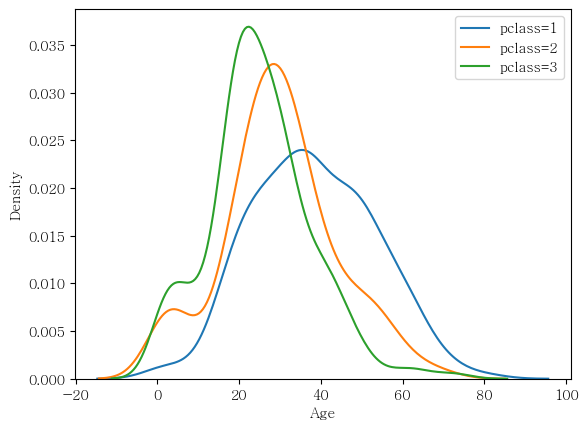

In [ ]:
#나이에 따른 탑승 등급 분포 

sns.kdeplot(
    data = titanic[titanic.Pclass == 1], x='Age',label = 'pclass=1'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 2], x='Age',label = 'pclass=2'
)
sns.kdeplot(
    data = titanic[titanic.Pclass == 3], x='Age',label = 'pclass=3'
)
plt.legend()
plt.show()

In [ ]:
#상기 그래프의 의미 : 클래스가 높을수록 나이많은 사람의 비중이 커짐

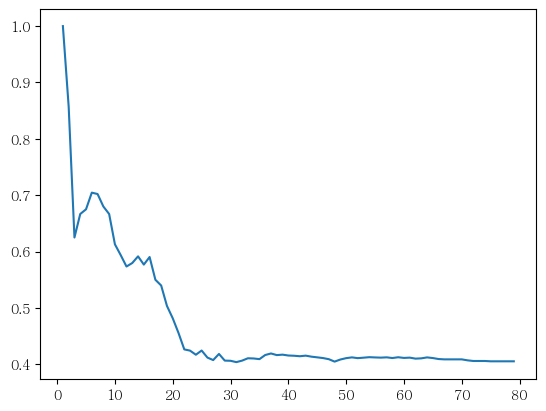

In [ ]:
#나이대가 변화하면서 생존률이 어떻게 될까
#나이대의 범위를 점점 넓혀가면서 생존률의 변화
multi_age_range=[titanic[titanic.Age<i].Survived.mean() for i in range(1,80)]
plt.plot(range(1,80), multi_age_range)
plt.show()

In [ ]:
#상기 그래프가 주는 의미
#나이가 어릴수록 생존률이 높다

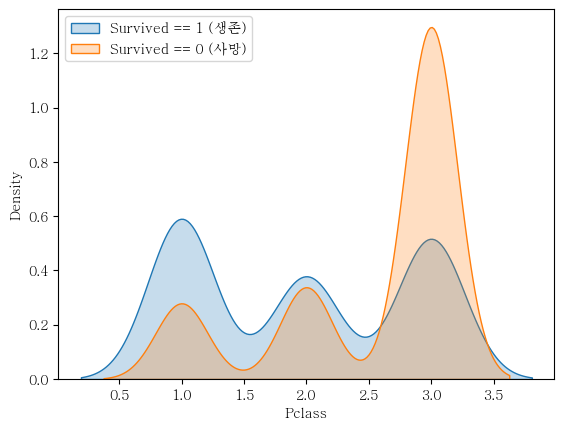

In [ ]:
# Pclass별로 생존유무에 대한 시각화



sns.kdeplot(
    data= titanic[titanic.Survived  == 1], x='Pclass', label = 'Survived == 1 (생존)', fill=True
)
sns.kdeplot(
    data= titanic[titanic.Survived == 0], x='Pclass', label = 'Survived == 0 (사망)', fill=True
)

plt.legend(loc='best')
plt.show()

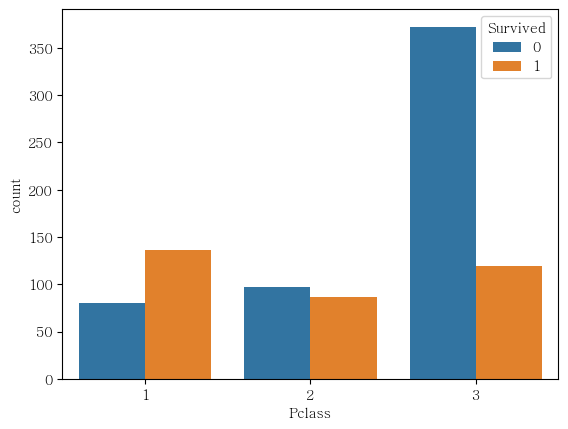

In [27]:
sns.countplot(data=titanic, x='Pclass', hue='Survived')
plt.show()

In [28]:
# titanic['Pclass']=pd.Categorical(
#     # titanic['Pclass'].astype(str),   #Pclass를 문자열로 바꿔서 X축에 1,2,3 으로 찍히도록
#     categories=["1", "2", "3"],   #원하는 순서 지정
#     ordered=True
# )

# sns.histplot(
#     data=titanic,
#     y="Pclass",
#     hue="Survived",
#     multiple="dodge",   # ← 옆으로 나란히
#     discrete=True,      # 1,2,3만 표시
#     shrink=0.8          # 막대 폭 조금 줄이기
# )

# plt.show()